In [149]:
import pandas as pd

import sqlalchemy
from sqlalchemy import create_engine, func, extract
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

from config import g_key
import gmaps

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [107]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [108]:
# Reflect an existing database into a new model:
Base = automap_base()

# Reflect the tables:
Base.prepare(engine, reflect=True)

In [109]:
# Save references to each table
Measurement = Base.classes.measurement

In [110]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [125]:
# Challenge steps:

# Determine the starting date covered in the analysis
# Determine the ending date covered in the analysis

# Extract the temperature observations for JUN across all years
# Determine the total number of JUN observations for each station

# Extract the temperature observations for DEC across all years
# Determine the total number of DEC observations for each station

# Compare key statistical data about the months of JUN & DEC across all years

# Get coordinates and information about the weather stations
# Create information pop up box for weather stations
# Create a map to illistrate the locations of the weather stations

In [112]:
# Determine the starting date covered in the analysis:
DRange = session.query(Measurement.date).\
        order_by((Measurement.date).desc()).all()
FirstDate = DRange[-1]
FirstDate

('2010-01-01')

In [113]:
# Determine the ending date covered in the analysis:
LastDate = DRange[0]
LastDate

('2017-08-23')

In [155]:
# Extract the temperature observations for JUN across all years:

from sqlalchemy import extract  

JUN_extract = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==6).all()

# Save the query results as a Pandas DataFrame and set the index to the Date column:

JUN_data = pd.DataFrame(JUN_extract, columns=['Station Id', 'Date', 'JUN Temps'])
JUN_data.set_index(JUN_data['Date'], inplace=True)
JUN_data.sort_index(ascending=True)
print(JUN_data.to_string(index=False))

  Station Id        Date  JUN Temps
 USC00519397  2010-06-01       78.0
 USC00519397  2010-06-02       76.0
 USC00519397  2010-06-03       78.0
 USC00519397  2010-06-04       76.0
 USC00519397  2010-06-05       77.0
 USC00519397  2010-06-06       78.0
 USC00519397  2010-06-07       77.0
 USC00519397  2010-06-08       78.0
 USC00519397  2010-06-09       78.0
 USC00519397  2010-06-10       79.0
 USC00519397  2010-06-11       78.0
 USC00519397  2010-06-12       78.0
 USC00519397  2010-06-13       78.0
 USC00519397  2010-06-14       77.0
 USC00519397  2010-06-15       78.0
 USC00519397  2010-06-16       78.0
 USC00519397  2010-06-17       77.0
 USC00519397  2010-06-18       77.0
 USC00519397  2010-06-19       82.0
 USC00519397  2010-06-20       78.0
 USC00519397  2010-06-21       78.0
 USC00519397  2010-06-22       78.0
 USC00519397  2010-06-23       78.0
 USC00519397  2010-06-24       78.0
 USC00519397  2010-06-25       77.0
 USC00519397  2010-06-26       76.0
 USC00519397  2010-06-27    

In [115]:
# Determine the total number of JUN observations for each station

JUN_obs_extract = session.query(Measurement.station, func.count(Measurement.station)).\
filter(extract('month', Measurement.date)==6).group_by(Measurement.station).order_by(Measurement.station).all()

# Save the query results as a Pandas DataFrame and set the index to the date column:

JUN_obs_data = pd.DataFrame(JUN_obs_extract, columns=['Station Id', 'JUN Observations'])
JUN_obs_data.set_index(JUN_obs_data['Station Id'], inplace=True)
JUN_obs_data.sort_index(ascending=True)
print(JUN_obs_data.to_string(index=False))

  Station Id  JUN Observations
 USC00511918               165
 USC00513117               236
 USC00514830               186
 USC00516128               223
 USC00517948               148
 USC00518838                38
 USC00519281               236
 USC00519397               236
 USC00519523               232


In [127]:
# Extract the temperature observations for DEC across all years:

DEC_extract = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==12).all()

# Save the query results as a Pandas DataFrame and set the index to the date column:

DEC_data = pd.DataFrame(DEC_extract, columns=['Station Id','Date', 'DEC Temps'])
DEC_data.set_index(DEC_data['Date'], inplace=True)
DEC_data.sort_index(ascending=True)
print(DEC_data.to_string(index=False))

  Station Id        Date  DEC Temps
 USC00519397  2010-12-01       76.0
 USC00519397  2010-12-03       74.0
 USC00519397  2010-12-04       74.0
 USC00519397  2010-12-06       64.0
 USC00519397  2010-12-07       64.0
 USC00519397  2010-12-08       67.0
 USC00519397  2010-12-09       77.0
 USC00519397  2010-12-10       66.0
 USC00519397  2010-12-11       69.0
 USC00519397  2010-12-12       68.0
 USC00519397  2010-12-13       68.0
 USC00519397  2010-12-14       71.0
 USC00519397  2010-12-15       74.0
 USC00519397  2010-12-16       67.0
 USC00519397  2010-12-17       66.0
 USC00519397  2010-12-18       69.0
 USC00519397  2010-12-19       71.0
 USC00519397  2010-12-23       70.0
 USC00519397  2010-12-24       70.0
 USC00519397  2010-12-26       74.0
 USC00519397  2010-12-27       74.0
 USC00519397  2010-12-28       71.0
 USC00519397  2010-12-29       75.0
 USC00519397  2010-12-30       75.0
 USC00519397  2010-12-31       72.0
 USC00519397  2011-12-01       69.0
 USC00519397  2011-12-02    

In [122]:
# Determine the total number of DEC observations for each station:

DEC_obs_extract = session.query(Measurement.station, func.count(Measurement.station)).\
filter(extract('month', Measurement.date)==12).group_by(Measurement.station).\
order_by(Measurement.station).all()

# Save the query results as a Pandas DataFrame and set the index to the date column:

DEC_obs_data = pd.DataFrame(DEC_obs_extract, columns=['Station Id', 'DEC Observations'])
DEC_obs_data.set_index(DEC_obs_data['Station Id'], inplace=True)
DEC_obs_data.sort_index(ascending=True)
print(DEC_obs_data.to_string(index=False))

  Station Id  DEC Observations
 USC00511918               152
 USC00513117               216
 USC00514830               178
 USC00516128               206
 USC00517948               109
 USC00518838                19
 USC00519281               217
 USC00519397               210
 USC00519523               210


In [170]:
# Compare key statistical data about the months of JUN & DEC across all years:

JUNDEC_Data = pd.merge(JUN_data, DEC_data, how="left", on=['Station Id', 'Station Id'])
JUNDEC_Data.describe()

,JUN Temps,DEC Temps
count,321448.000000,321448.000000
mean,74.899642,70.997779
std,3.229149,3.713748
min,64.000000,56.000000
25%,72.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [176]:
# Isolate the mean for JUN:

meanJUN = JUNDEC_Data.describe()['JUN Temps']['mean']
meanJUN

74.89964162166198

In [177]:
# Isolate the mean for DEC:

meanDEC = JUNDEC_Data.describe()['DEC Temps']['mean']
meanDEC

70.99777880092581

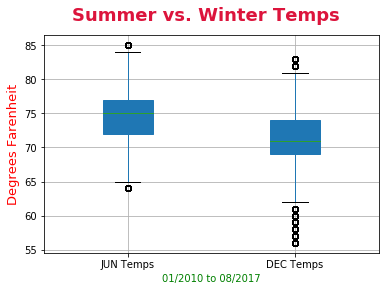

In [299]:
JUNDEC_graph = pd.DataFrame(JUNDEC_Data, columns = ['JUN Temps', 'DEC Temps'])
fig=plt.figure()
fig.suptitle('Summer vs. Winter Temps', fontsize=18, fontweight='bold', color='crimson')
JUNDEC_graph.boxplot(patch_artist=True, widths=(.3,.3))
plt.ylabel('Degrees Farenheit', fontsize=13, color='red')
plt.xlabel('01/2010 to 08/2017', color='green')
plt.savefig('Temp Comparison.png')
plt.show()


In [257]:
# Get coordinates and information about the weather stations

Station = Base.classes.station
Station_extract = session.query(Station.station, Station.name, Station.latitude, 
                                Station.longitude, Station.elevation).all()

Station_data = pd.DataFrame(Station_extract, columns=['Station Id', 'Station Name', 
                                                      'Latitude', 'Longitude', 'Elevation'])
Station_data.set_index(Station_data['Station Id'], inplace=True)
print(Station_data.to_string(index=False))

  Station Id                            Station Name  Latitude  Longitude  Elevation
 USC00519397                    WAIKIKI 717.2, HI US  21.27160 -157.81680        3.0
 USC00513117                    KANEOHE 838.1, HI US  21.42340 -157.80150       14.6
 USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130 -157.83740        7.0
 USC00517948                       PEARL CITY, HI US  21.39340 -157.97510       11.9
 USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920 -158.01110      306.6
 USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556 -157.71139       19.5
 USC00519281                     WAIHEE 837.5, HI US  21.45167 -157.84889       32.9
 USC00511918       HONOLULU OBSERVATORY 702.2, HI US  21.31520 -157.99920        0.9
 USC00516128            MANOA LYON ARBO 785.2, HI US  21.33310 -157.80250      152.4


In [49]:
# Create information pop up box for weather stations:

info_box_template = """
<dl>
<dt>Station ID</dt><dd>{station}</dd>
<dt>Name</dt><dd>{name}</dd>
<dt>Elevation</dt><dd>{elevation}</dd>
</dl>
"""

# Store the DataFrame Row:

station_info = [info_box_template.format(**row) for index, row in Station_data.iterrows()]

In [101]:
# Create a map to illistrate the locations of the weather stations:

gmaps.configure(api_key = g_key)
locations = Station_data[["Latitude", "Longitude"]]

fig = gmaps.figure(center=(21.48, -157.85), zoom_level=10.0)

marker_layer = gmaps.marker_layer(locations, info_box_content=station_info)                                 
                                  
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))